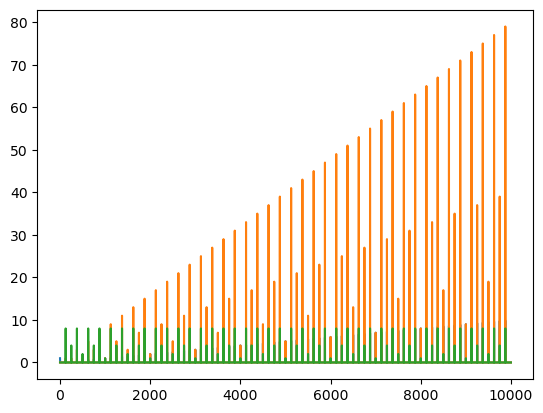

In [1]:
import matplotlib.pyplot as plt


def isq(x, limdigits=2):
    q = x.as_integer_ratio()
    if len(str(q[1])) > limdigits:
        return (False, q[0], q[1])
    return (True, q[0], q[1])

def thomae(x):
    if x == 0:
        return 1, 0, 0
    isxrational = isq(x)
    if isxrational[0]:
        return isxrational[1] / isxrational[2], isxrational[1], isxrational[2]
    return 0, 0, 0


x = list(range(10000))
y = [thomae(n*0.001) for n in range(10000)]
plt.plot(y)
plt.show()

In [2]:
import math

print(math.log(math.pi) * math.e)

3.1116984471984215


In [15]:
# Floyd

def floyd(n=10):
    res = []
    k = 1
    while k < n:
        res += [list(range(int(k*(k-1)/2),int(k*(k+1)/2)))]
        k += 1
    return res

floyd(12)

[[0],
 [1, 2],
 [3, 4, 5],
 [6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27],
 [28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44],
 [45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
 [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]]

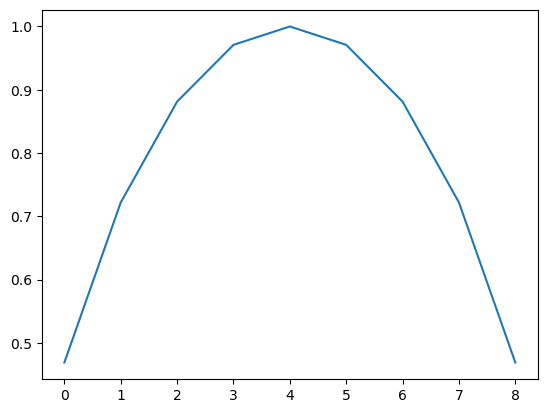

In [26]:
import matplotlib.pyplot as plt
import math

L = 10
plt.plot([-p/L*math.log(p/L, 2) - (1-p/L) * math.log((1-p/L), 2) for p in range(1, 10, 1)])
plt.show()

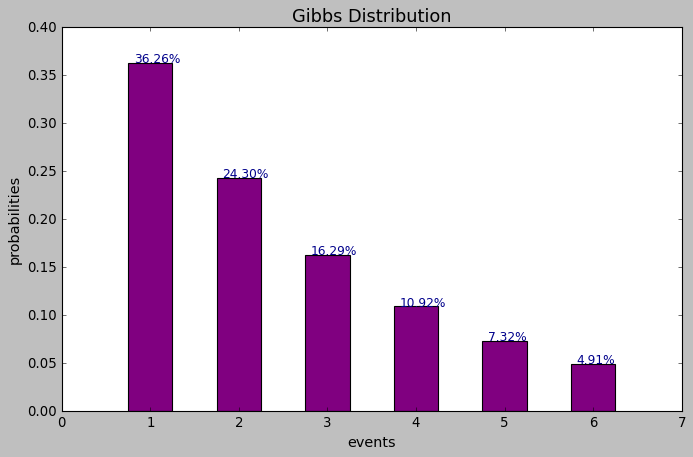

iterations=1: (-0.411,0.109)


In [22]:
from dataclasses import dataclass , field
from itertools import count
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class MaxEnt:
    
    payoffs : np.ndarray
    multiplier : float = field(init = False , default = None)
    
    def partition_function(self, mu: float) -> float:
        return (np.e**(-mu * self.payoffs)).sum()
    
    def gibbs_distr(self, mu : float ) -> np.ndarray:
        partition = self.partition_function( mu )
        return np.e**(-mu * self.payoffs) / partition

    def _trainer(self , mean : float , mu : float) -> float:
        return mean - np.dot( self.payoffs , self.gibbs_distr(mu) )

    def _gradient(self , mu : float ) -> float:
        gibbs = self.gibbs_distr(mu)
        return np.dot( self.payoffs**2 , gibbs ) - np.dot( self.payoffs , gibbs )**2

    def fit(self , mean:float , tolerance : float = 1e-10 , 
                   max_iter : int = 100 , verbose : bool = False ) -> None:
        mu = 0
        counter = count()
        iterations = next(counter)
        while abs(self._trainer(mean , mu)) > tolerance:

            ### Newton-Raphson implementation
            mu = mu - self._trainer(mean , mu)/self._gradient(mu)

            iterations = next(counter)
            if verbose:
                print(f'{iterations=}: ({mu:.3f},{self._trainer(mean,mu):.3f})')

            if iterations > max_iter:
                print("Maximum iterations limit exceeded.")
            break

        ### assigned the trained value to our multiplier attribute
        self.multiplier = mu


def main():
    payoffs = np.arange(1,7,1)
    model = MaxEnt( payoffs )
                
    multiplier = 0.4
    total_events = 6
    
    with plt.style.context('classic'):
        fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
        probabilities = model.gibbs_distr(multiplier)
        ax.bar(np.arange(1, total_events+1, 1) , probabilities , width = 0.5 , color = 'purple')
        ax.set_title("Gibbs Distribution" , size = 16)
        ax.set_ylabel("probabilities" , size = 13)
        ax.set_xlabel("events" , size = 13)
        for i , patch in enumerate(ax.patches):
            ax.annotate(text = f'{probabilities[i]*100:.2f}%' , 
                        xy = (patch.get_x() + patch.get_width()/8 , probabilities[i]),
                       size = 11,color = 'darkblue')
        plt.show();
        
if __name__ == "__main__": main()

f = lambda i : i #different mappings can also be used, e.g. f = lambda i : i**2
total_events = 6
payoffs = f(np.arange(1,total_events+1,1))
model = MaxEnt(payoffs)
sample_mean = 4.7

model.fit(sample_mean , verbose = True)